# Group Project Advanced Topics in Machine Learning
### Group 6: Stefan Jonas, Simon Curty, Jonas Räber
### Book Covers

In the scope of this project, we explore two tasks:

* Predicting a book's genre based on its cover.
* Generating book covers for a given genre.

A pretrained model, a dataset with the cover links and a selection of sample covers can be found [here](https://drive.google.com/drive/folders/1yoCxZrAMft0ifL6Imt3CRpUejWQZYO_C?usp=sharing).

Our dataset is based on the dataset compiled by:
* B. K. Iwana, S. T. Raza Rizvi, S. Ahmed, A. Dengel, and S. Uchida, **Judging a Book by its Cover**, arXiv (2016). (https://github.com/uchidalab/book-dataset)


## Downloading the covers
On the above linked drive only a sample set of covers can be found. However, we provide a script to download all covers from Amazon.

1. Download the prepared dataset (json file) from the drive or from github under `data/processed/`.
1. Run the cell below.

In [1]:
from utils.fetch_image import download_covers

json_file = 'data/processed/books_200000.json'
covers_save_dir = 'data/covers/coversraw'
log_dir = 'data/covers'

download_covers(json_file, covers_save_dir, log_dir, verbose=False)

Done


The covers will be converted to JPEGs while downloading. There is also a facility in place to convert already downloaded 
images to the JPEG-format.

In [6]:
from utils.convert_images import convert_to_jpeg
covers_save_dir = 'data/covers/coversraw'

convert_to_jpeg(covers_save_dir, verbose=False)

Done


Now the cover images have to be moved in folders accoring to their genre.

In [1]:
from utils.split_dataset import create_image_folders

covers_extension = '.jpeg'
covers_src_dir = 'data/covers/coversraw/'
covers_target_dir = 'data/covers/'
json_file = 'data/processed/books_200000.json'
test_split = .1
val_split = .1

create_image_folders(json_file, covers_src_dir, covers_target_dir, test_split, val_split)

Done


# Classification

For the classification we used transfer learning with fixed feature using two different networks, both pretrained on ImageNet. Only the linear output layer is learned. The same method is described in the above mentioned paper. This makes sense, as the image classification task used in this context is very similar to the one where the networks are trained on.

The two networks are:
- AlexNet: Krizhevsky, Alex, Ilya Sutskever and Geoffrey E. Hinton. “ImageNet Classification with Deep Convolutional Neural Networks.” Commun. ACM 60 (2012): 84-90. (https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)
- DenseNet: Huang, Gao, Zhuang Liu and Kilian Q. Weinberger. “Densely Connected Convolutional Networks.” 2017 IEEE Conference on Computer Vision and Pattern Recognition (CVPR) (2017): 2261-2269. (https://arxiv.org/pdf/1608.06993v3.pdf)

The training was done for two different configurations of the dataset. Once for the full 200k sample dataset with uneven distributed number of samples per class. This lead to higher accuracy because some bigger classes which were better learned had more impact on the overall accuracy.

For the second approach the dataset was normalized that every class contained the same amount of data. Therefore two classes were dropped to not make the dataset to small ('Teaching & Education' and 'Gay & Lesbian' were dropped).






### Setup
For the classification first the Classifier has to be initialized with the necessary hyperparameters and the path from where to Load the data from

In [2]:
from classification import Classification
from utils_print import *

### Setup
network_name = 'alexnet' # 'alexnet' or 'densenet'
n_epochs = 10
data_path = 'data/covers/' # where the training data is located
meta_path = 'data/meta/' # where some meta files corresponding to the meta data are located
batch_size = 32
save_dir = 'parameters/sample/' # where the model parameter and metrics are saved to

classifier = Classification(data_path = data_path, meta_path = meta_path, batch_size = batch_size, save_dir=save_dir)

Amount in the training set: 7990
Amount in the test set: 1000
Amount in the validation set: 1000


### Train
To train the network the number of epochs and the information which network to train needs to be defined

In [ ]:
### training
classifier.train(network_name=network_name, n_epochs = n_epochs, do_print = True)

### Test
For testing the network is loaded from file. It is therefore possible to test trained Networks when choosing an apropriate save path

In [ ]:
### test
save_dir = 'parameters/alex_2/'
test_classifier = Classification(data_path = data_path, meta_path = meta_path, batch_size = batch_size, save_dir=save_dir)
test_classifier.test(network_name = network_name)

### Plot results
For plotting the results the saved metrics are loaded from file

In [3]:
### Setup path of saved parameter files
savedir_alex = 'parameters/alex_2/'
dataset_alex_name = 'alexnet'

savedir_alexNorm = 'parameters/alex_normalized/'

savedir_dense = 'parameters/dense_2/'
dataset_dense_name = 'densenet'

savedir_denseNorm = 'parameters/dense_normalized/'

Top 1 accuracy: alexnet:28.5479, alexnet normalized:23.9437, densenet:30.7902, densenet normalized:26.9749
Top 3 accuracy: alexnet:48.5780, alexnet normalized:42.2076, densenet:51.4878, densenet normalized:47.7648


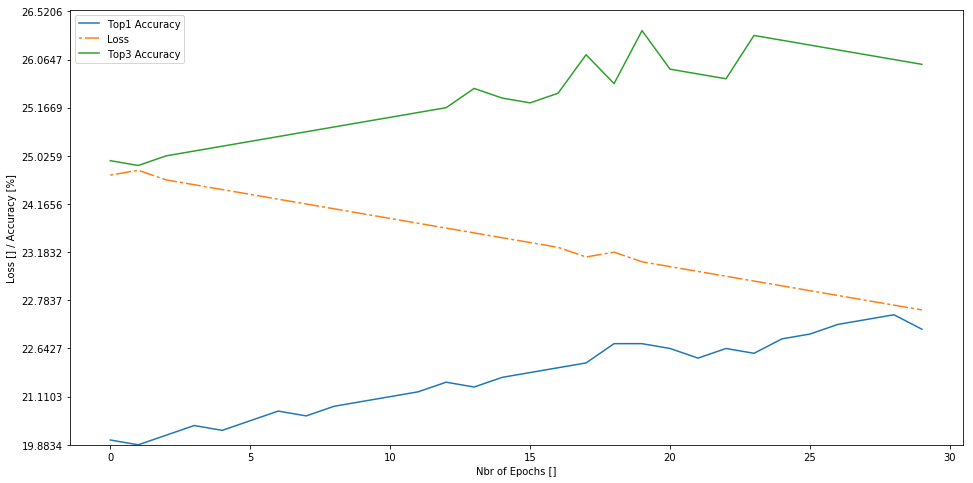

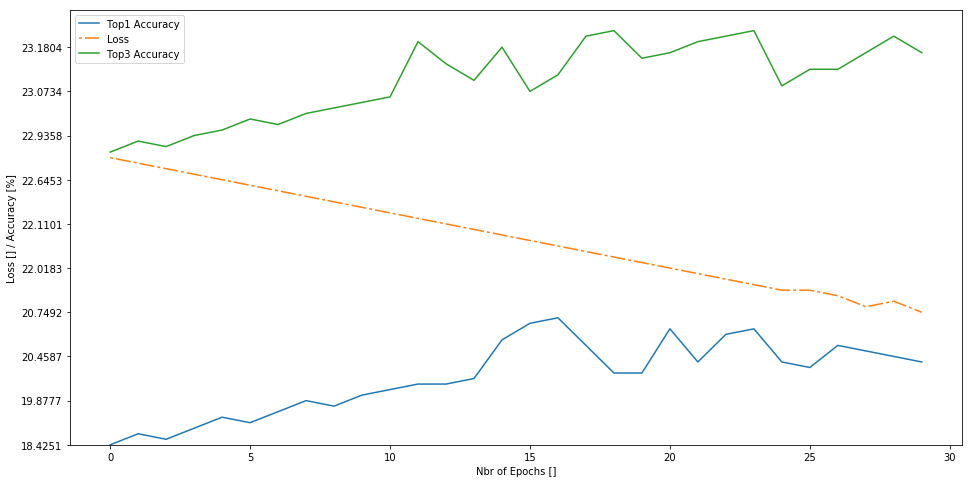

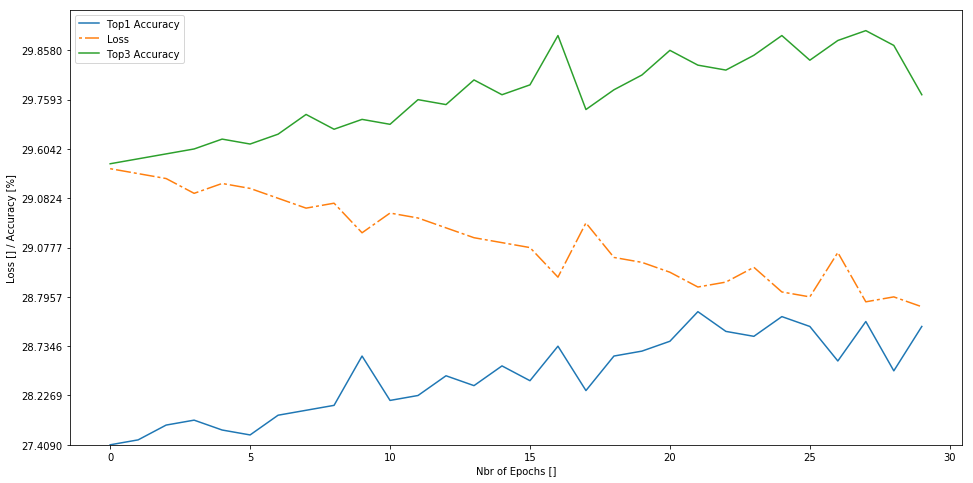

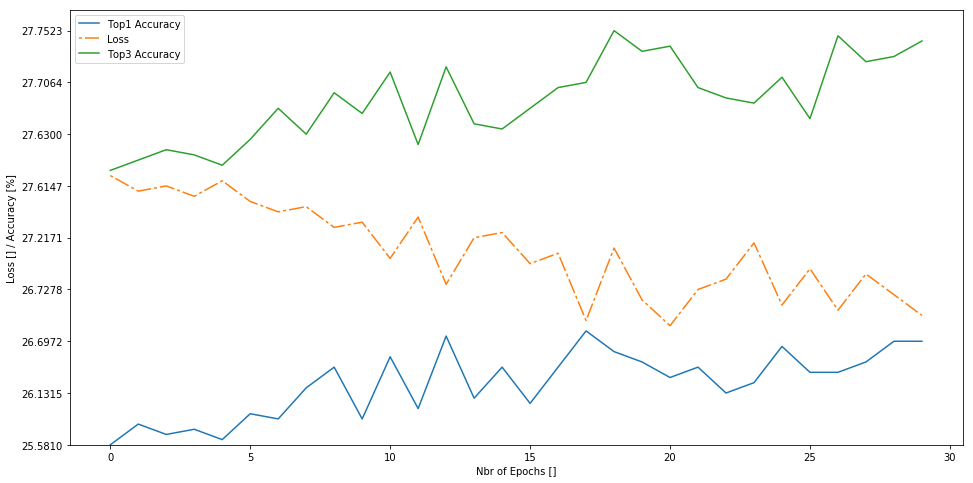

In [6]:
from utils_print import *

### Load data from files
alexData = load_per_label(savedir_alex, dataset_alex_name, 'test')
alexTop1, alexTop3 = load_acc(savedir_alex, dataset_alex_name, 'test')
alexLearning = load_learning(savedir_alex, dataset_alex_name, 'validation')

alexNormData = load_per_label(savedir_alexNorm, dataset_alex_name, 'test')
alexNormTop1, alexNormTop3 = load_acc(savedir_alexNorm, dataset_alex_name, 'test')
alexNormLearning = load_learning(savedir_alexNorm, dataset_alex_name, 'validation')

denseData = load_per_label(savedir_dense, dataset_dense_name, 'test')
denseTop1, denseTop3 = load_acc(savedir_dense, dataset_dense_name, 'test')
denseLearning = load_learning(savedir_dense, dataset_dense_name, 'validation')

denseNormData = load_per_label(savedir_denseNorm, dataset_dense_name, 'test')
denseNormTop1, denseNormTop3 = load_acc(savedir_denseNorm, dataset_dense_name, 'test')
denseNormLearning = load_learning(savedir_denseNorm, dataset_dense_name, 'validation')

### Display overall accuracies:
print('Top 1 accuracy: alexnet:' + alexTop1 + ', alexnet normalized:' + alexNormTop1 + ', densenet:' + denseTop1 + ', densenet normalized:' + denseNormTop1)
print('Top 3 accuracy: alexnet:' + alexTop3 + ', alexnet normalized:' + alexNormTop3 + ', densenet:' + denseTop3 + ', densenet normalized:' + denseNormTop3)

plot_learning(alexLearning, 'learning_alex.jpg')
plot_learning(alexNormLearning, 'learning_alex_norm.jpg')
plot_learning(denseLearning, 'learning_dense.jpg')
plot_learning(denseNormLearning, 'learning_dense_norm.jpg')

### Results

The following Plots show how the different Networks are performing. Our approach with the AlexNet on the normalized dataset performs very similar to the networks from the paper mentioned above. The DenseNet outperforms the Alexnet by aproximately 3% for the top1 accuracy.

As already mentioned, is the accuracy on the non normalized dataset better.

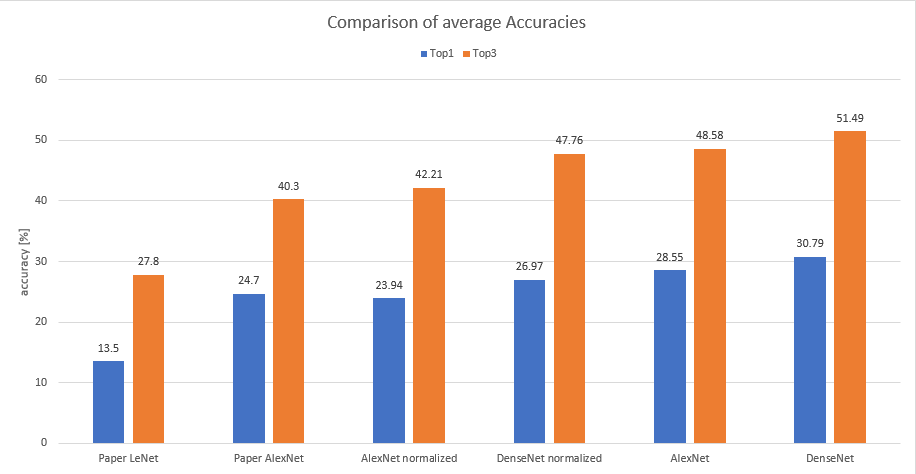


The accuracy varies storngly between the different classes. Reasons we can guess are, that some genres often have very clearly defined objects on the cover while others are widley different or very similar to some other classes. Examples are "Cookbooks" which very often have food on the cover or "Scientific" book which often have two colors and a strict border between, but which are very similar to e.g. "Law" books.


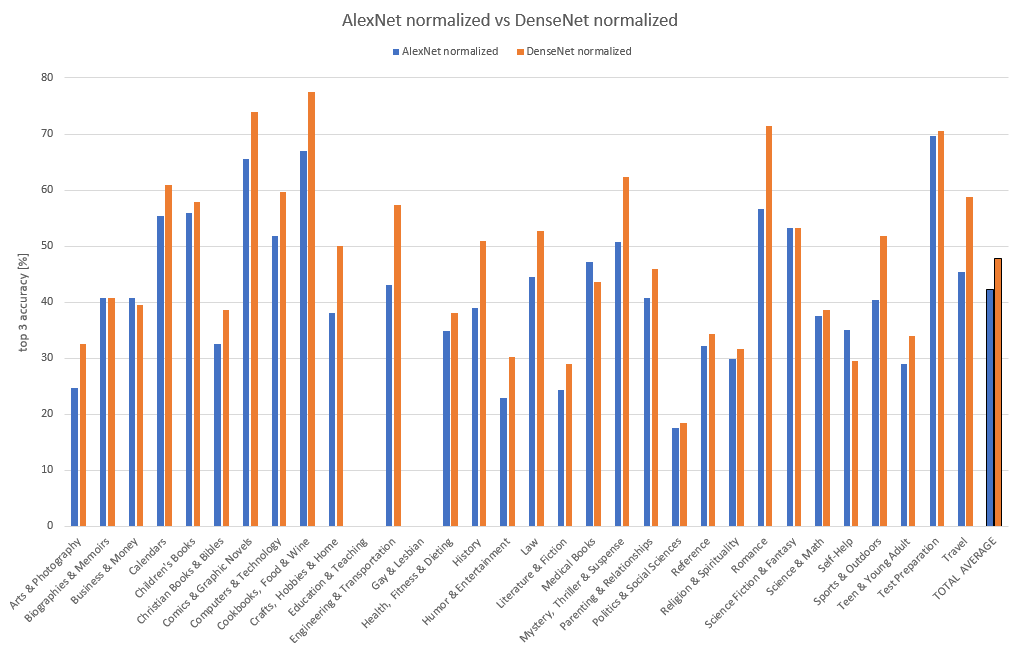

There is not a lot of difference between the per lable performance of the two different networks. DenseNet is just performing better on most of the classes.

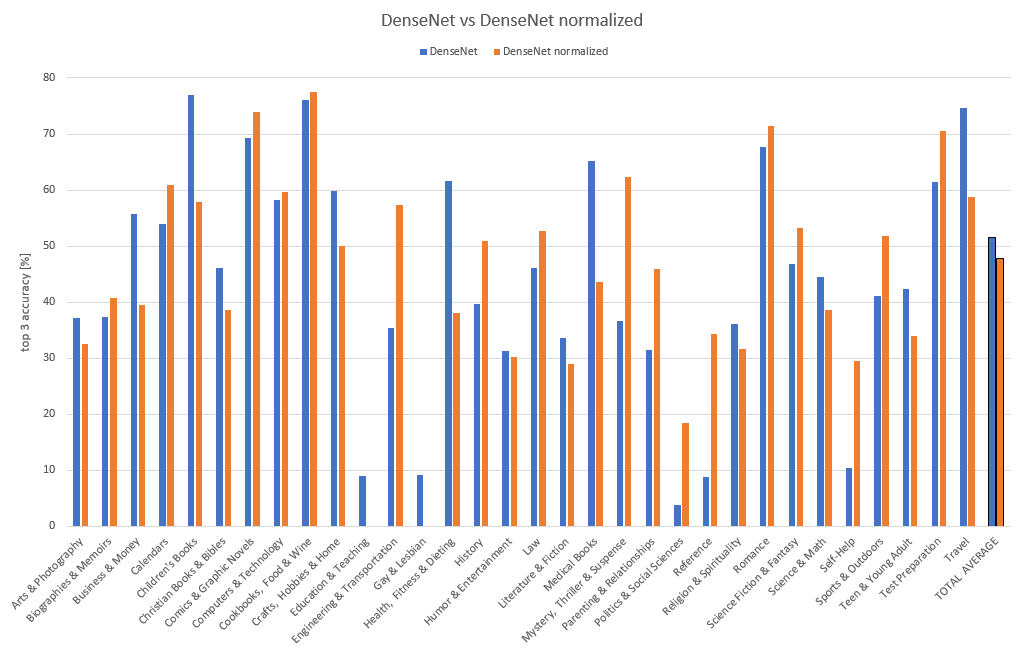

Also, even when there is some difference between the classes in how much the top1 and top3 accuracy differ, no clear trend can be seen.

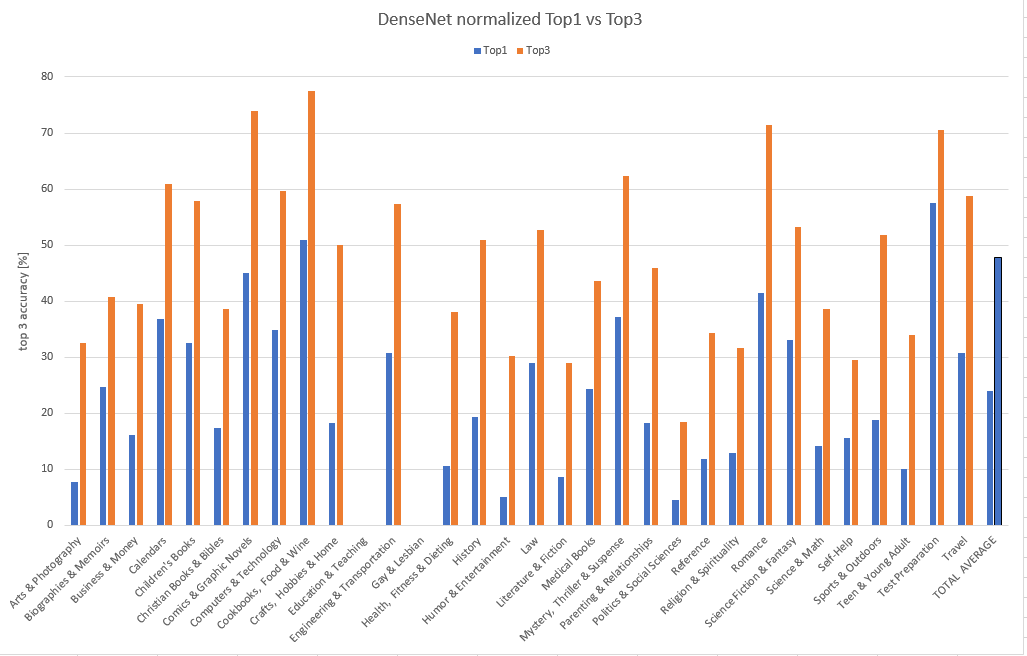



# Cover Generation with a GAN

### Approach Description

The goal was to create automatically generated cover "templates", which can be used for human evaluation of specific category features. This was used a side task, analogous to trying to find discriminant features in related work.

The used architecture was a Wasserstein GAN with gradient penalty (https://arxiv.org/abs/1704.00028, https://github.com/eriklindernoren/PyTorch-GAN#wasserstein-gan-gp).

Only a simple Wasserstein GAN with gradient penalty architecture was reasonably successful for our task. The name "simple" refers to the generator, which is based on a MNIST approach (simple neural network to create 1D images) adjusted for our 3 channels 32x32 downsized images, as they should lose unnecessary high definition features.

### Prerequisites

The GAN is not using the same dataset folder as the classification!
The user has to manually select a certain category folder, i.e. "business_money" and copy it into a specified seperate location. The gan will then *only* train on these images, to specify a certain category or categories. 

Example folder structure on the cluster on which the GAN will be trained on:
**/var/tmp/GAN/business_money**

The folder in which iteratively images are being saved in can be defined dynamically, but is by default:
**/home/studi6/gan/fakes/simple**

### Running the script

**nohup python wgan_gp_simple.py --n_epochs=500 2>&1 > runoutF.txt &** will result in the same output types as shown below if trained on the category "law". We recommend leaving the default values such as batch size and learning rate, but they can be adjusted.

### GAN Code (Snippets)

To avoid clutter, only key code snippets are shown. (They are not runable within this instance.) After wgan_gp_simple.py was run, the output (loss metric history as txt file, created images as png) was stored locally, which will be further evaluated within this notebook.

**The generator: Note the easy generation procedure.**

    class Generator(nn.Module):
        def __init__(self):
            super(Generator, self).__init__()
    
            def block(in_feat, out_feat, normalize=True):
                layers = [nn.Linear(in_feat, out_feat)]
                if normalize:
                    layers.append(nn.BatchNorm1d(out_feat, 0.8))
                layers.append(nn.LeakyReLU(0.2, inplace=True))
                return layers
    
            self.model = nn.Sequential(
                *block(args.latent_dim, 256, normalize=False),
                *block(256, 512),
                *block(512, 768),
                *block(768, 1024),
                nn.Linear(1024, int(np.prod(img_shape))),
                nn.Tanh()
            )
    
        def forward(self, z):
            img = self.model(z)
            img = img.view(img.shape[0], *img_shape)
            return img


**Importing the cover dataset -- note the different normalization and downscaling**

    target_size = (args.img_size, args.img_size)
    transforms = Compose([Resize(target_size),
                        ToTensor(),
                        Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
                        ])
    
    train_dataset = ImageFolder(dataset_path, transform=transforms)
    dataloader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True)
    


### GAN Evaluation: Run on the category "Law"

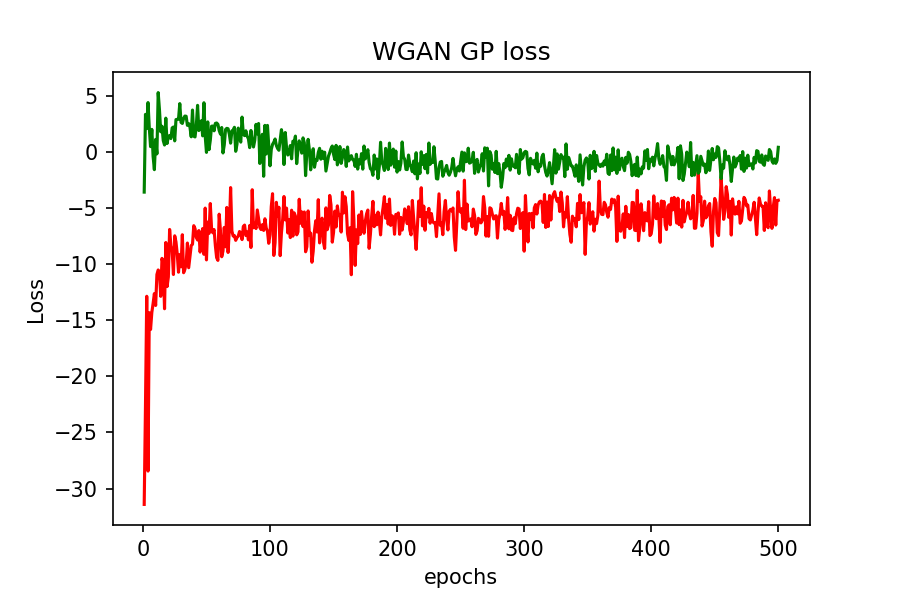

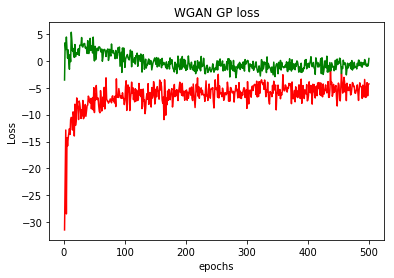

In [44]:
# plot the losses:
# originally stored in the runout file, then postprocessed into a csv for easier import

from utils_print import plot_gan_losses
savedir_gan = "gandata/"
csv_name_law = "loss_simpleWGAN_law.csv"
filename_gan_loss="example_GAN_loss"

plot_gan_losses(savedir_gan, csv_name_law, filename_gan_loss)

# Show image
from IPython.display import display
from PIL import Image

# start of training
path="plots/"+filename_gan_loss+".png"
display(Image.open(path))

This was the only architecture which showed this reasonable loss progression. While it's not ideal, it did solve the problem we had with "normal" GANs, where the discriminator loss immediatelly fell towards 0, despite our efforts.

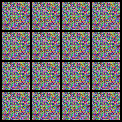

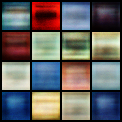

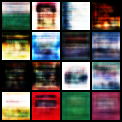

In [45]:
# show some created images
# Show image
from IPython.display import display
from PIL import Image

# start of training
path=savedir_gan+"0.png"
display(Image.open(path))

# very early stages
path=savedir_gan+"3200.png"
display(Image.open(path))

# towards the end
# makes slightly more sense, still blurry and not ideal
path=savedir_gan+"50400.png"
display(Image.open(path))

The pictures do show some resemblance to covers of the category "law". 